# Coursework



#### I. Environment

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
import gym
from gym import Env, logger, spaces, utils

* Create class for the grid (6x6) where the agent will move/learn: 

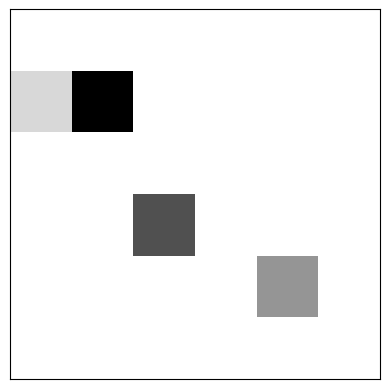

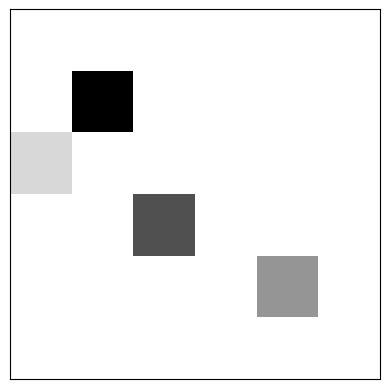

Action: 1, State: [2 0], Reward: -0.2, Done: False


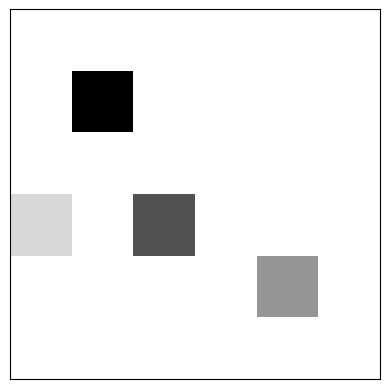

Action: 1, State: [3 0], Reward: -0.2, Done: False


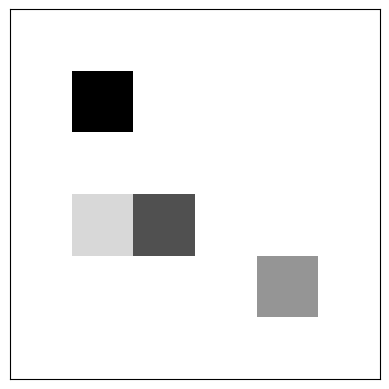

Action: 3, State: [3 1], Reward: -0.2, Done: False


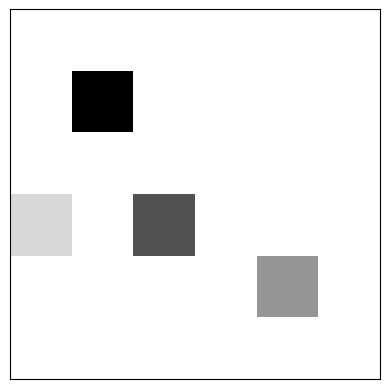

Action: 2, State: [3 0], Reward: -0.2, Done: False


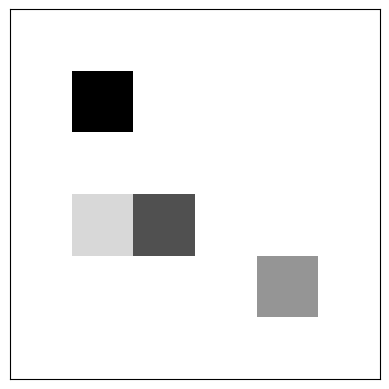

Action: 3, State: [3 1], Reward: -0.2, Done: False


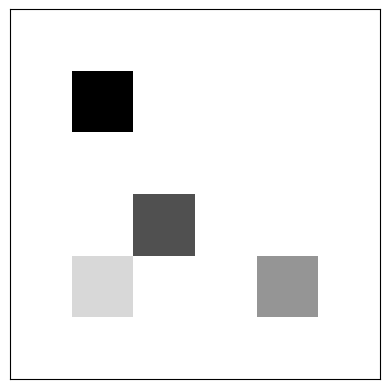

Action: 1, State: [4 1], Reward: -0.2, Done: False


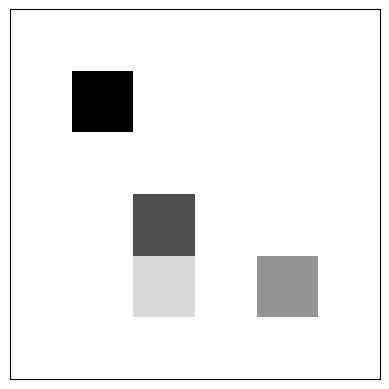

Action: 3, State: [4 2], Reward: -0.2, Done: False


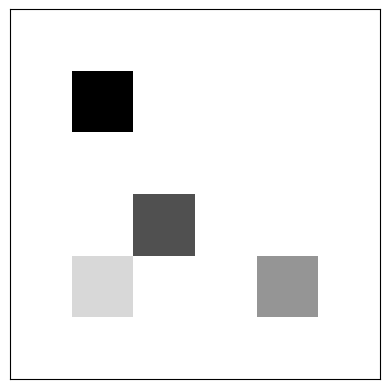

Action: 2, State: [4 1], Reward: -0.2, Done: False


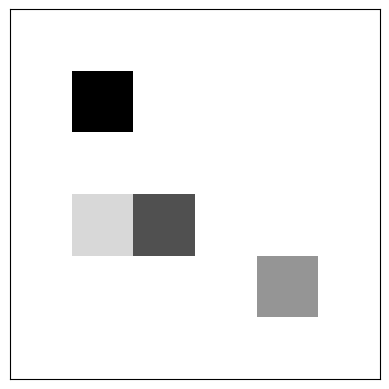

Action: 0, State: [3 1], Reward: -0.2, Done: False


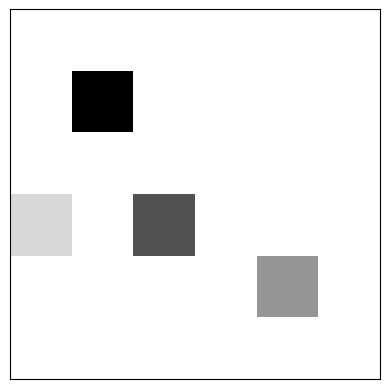

Action: 2, State: [3 0], Reward: -0.2, Done: False


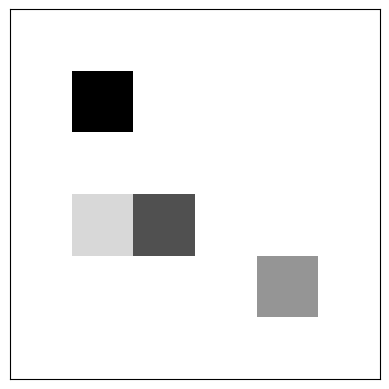

Action: 3, State: [3 1], Reward: -0.2, Done: False


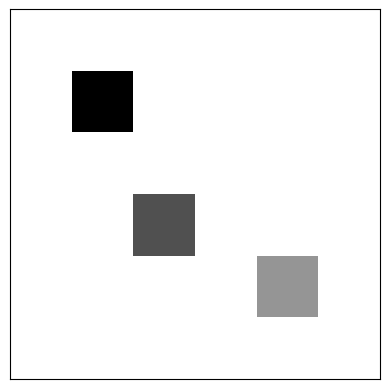

Action: 3, State: [3 2], Reward: -5, Done: True


In [31]:
class gridEnv(gym.Env):
    def __init__(self, mapsize=(6, 6), princess_position=(4, 4), dragon_position=(3,2), ladder_position=(1,1)):
        super(gridEnv, self).__init__()
        
        # Size of the grid 
        self.mapsize = mapsize
        self.princess_position = princess_position
        self.dragon_position = dragon_position
        self.ladder_position = ladder_position  
        
        # Define action space: u, d, l, r
        self.action_space = spaces.Discrete(4)
        
        # Define observation space
        self.observation_space = spaces.Box(low=0, high=max(self.mapsize), shape=(2,), dtype=np.int32)
        
        # State (agent's position) and map grid
        self.state = np.array([1, 0])  # Agent starts at (0, 0)
        self.grid = np.zeros(self.mapsize)  
        
        self.done = False #terminal state
    
    def reset(self):
        # Reset the agent's position and the grid
        self.state = np.array([1, 0])  # Reset agent to start position (0, 0)
        self.done = False
        
        # Reset the grid (zeros) and place the goal position
        self.grid = np.zeros(self.mapsize)
        self.grid[self.princess_position[0], self.princess_position[1]] = 2  
        self.grid[self.dragon_position[0], self.dragon_position[1]] = 3
        self.grid[self.ladder_position[0], self.dragon_position[1]] = 4
        
        return self.state

    
    def step(self, action):
        # Move the agent based on the action: up, down, left, right
        if action == 0:  # Move up
            self.state[0] = max(0, self.state[0] - 1)
        elif action == 1:  # Move down
            self.state[0] = min(self.mapsize[0] - 1, self.state[0] + 1)
        elif action == 2:  # Move left
            self.state[1] = max(0, self.state[1] - 1)
        elif action == 3:  # Move right
            self.state[1] = min(self.mapsize[1] - 1, self.state[1] + 1)

        # Check if the agent reached the goal
        if np.array_equal(self.state, self.princess_position):
            reward = 1
            self.done = True
            
        elif np.array_equal(self.state, self.dragon_position):
            reward = -5
            self.done = True #Hitting dragon is a terminal state
            
        elif np.array_equal(self.state, self.ladder_position):
            reward = 0.1 #small reward for picking up ladder 
            
        else: 
            reward = -0.2  #penalise if step taken with no win
        
        return self.state, reward, self.done, {}


    def render(self, mode='human'):
        # Clear the grid and update it with the agent's current position
        self.grid = np.zeros(self.mapsize)
        self.grid[self.princess_position[0], self.princess_position[1]] = 2  # Goal is marked as 2
        self.grid[self.state[0], self.state[1]] = 1  # Agent is marked as 1
        self.grid[self.dragon_position[0], self.dragon_position[1]] = 3
        self.grid[self.ladder_position[0], self.ladder_position[1]] = 4
        
        # Plot the grid
        plt.imshow(self.grid, cmap='Greys', interpolation='nearest')
        plt.xticks([])  # Hide x-axis ticks
        plt.yticks([])  # Hide y-axis ticks
        plt.show()


# Test the custom environment with a grid
if __name__ == "__main__":
    env = gridEnv()
    state = env.reset()
    env.render()
    
    done = False
    while not done:
        action = env.action_space.sample()  # Take random actions
        state, reward, done, _ = env.step(action)
        env.render()
        print(f"Action: {action}, State: {state}, Reward: {reward}, Done: {done}")

In [28]:
env.observation_space.sample()
    

array([5, 3], dtype=int32)

#### II. Q-learning policy

#### III. Deep Q-Learning

#### IV. Advanced Tasks